In [1]:
import timeit
total_start_t = timeit.default_timer()
starttime = timeit.default_timer()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#necessary for compiling in jupyter (inline)
%matplotlib inline  


'''Adult Data Set
https://www.kaggle.com/wenruliu/adult-income-dataset'''

feat_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

'''using na_values parameter to to recognize "?" character as NA/NaN value to could drop NaN columns
later on'''
adultdf = pd.read_csv('Data/Adult/adult.csv', na_values = "?")  #(48843, 15)
print(adultdf.shape)
print("The execution time for this part of code is {:.1f}".format(timeit.default_timer() - starttime), "s")

(48842, 15)
The execution time for this part of code is 3.2 s


In [2]:
'''fnlwgt - final weight to independent estimates of the civilian
noninstitutional population of US'''
adultdf.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
adultdf.describe() #to show statistical information about the features

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


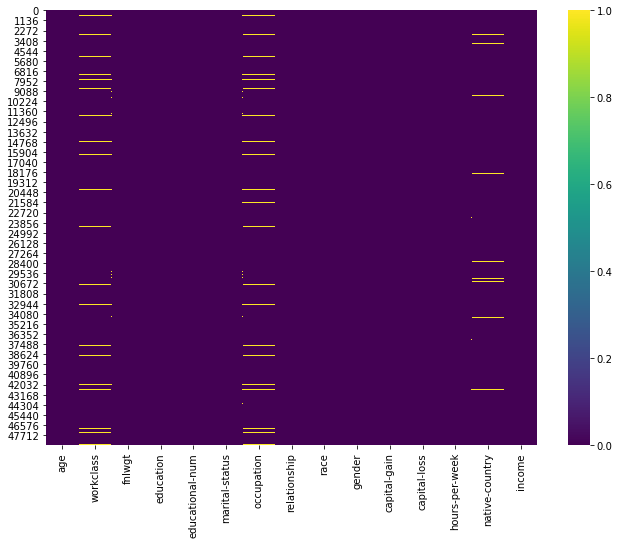

In [4]:
print(adultdf.isnull().sum())    #To count missing data values 
plt.figure(figsize = (11,8)) #changing the default size
sns.heatmap(adultdf.isnull(), cmap='viridis')

In [5]:
print("\nZeros:\n",(adultdf==0).sum())
adultdf.dtypes


Zeros:
 age                    0
workclass              0
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain       44807
capital-loss       46560
hours-per-week         0
native-country         0
income                 0
dtype: int64


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

## Removing 'capital-gain' and 'capital-loss' column as contain too many '0' values

In [6]:
'''To remove/drop irrelevant columns'''
#inplace in drop method: to remove selected columns/data permanently
adultdf.drop(['capital-gain','capital-loss'], axis = 1, inplace = True) 
adultdf.head(5)
adultdf.shape

(48842, 13)

In [7]:
'''Counting "?" in dataset
This loop was implemented and used before applying na_values parameter
into pd.read_csv()'''   
# n = 0
# for row in adultdf['workclass']:
#     if row == '?':
#         n+=1
        
# print("Number of '?' in comumn:",n)
# print("\nUnique values:\n", adultdf.nunique())

'Counting "?" in dataset\nThis loop was implemented and used before applying na_values parameter\ninto pd.read_csv()'

In [8]:
'''Value Count. Trying to find unique/unusuall data values 
in object clolumns/looking for "?" character. It was useful before applying na_values parameter
in pd.read_csv(). The aim was to find and count the '?' characters and see other categorical variables'''
adultdf['workclass'].value_counts() # ? = 2799
adultdf['occupation'].value_counts() # ? = 2809
adultdf['marital-status'].value_counts()
adultdf['education'].value_counts()
adultdf['relationship'].value_counts()
adultdf['race'].value_counts()
adultdf['gender'].value_counts()
adultdf['native-country'].value_counts() # ? = 857
adultdf['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

# Making dataset more neat

### Dropping all the rows whith NaN/missing values

In [9]:
print("NaN/missing values before dropping rows\n",adultdf.isnull().sum())    #To count missing/NaN data values which were '?' characters before conversion
#dropna to remove missing values
#subset to define which rows to drop from certain column/s
'''‘any’ : Determine if row or column is removed from DataFrame, 
when we have at least one If any NA values are present, drop that row or column'''
adultdf.dropna(subset=['occupation'], how='any', inplace=True)

'''In both "occupation" and "workclass" columns the NaN values are matching
in the same rows, therefore don't need to drop for workclass as already done by dropping ocupation
To check these columns entirely could apply:

pd.set_option("max_rows", None)
adultdf.iloc[:,[1,6]]
'''

adultdf.dropna(subset=['native-country'], how='any', inplace=True)
print("\nMissing values after dropping all NaN value rows\n",adultdf.isnull().sum())

adultdf.shape

NaN/missing values before dropping rows
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
hours-per-week        0
native-country      857
income                0
dtype: int64

Missing values after dropping all NaN value rows
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64


(45222, 13)

### Combining related values in specific columns to make dataset easier to interpret

In [10]:
'''Combine 'Local-gov','State-gov' and 'Federal-gov' values into one "gov-public" '''
adultdf.workclass = adultdf.workclass.replace(['Local-gov','State-gov','Federal-gov'],'gov-public')

In [11]:
'''Combining 'education' values'''
adultdf.education = adultdf.education.replace(['Preschool','1st-4th','12th', '9th', '5th-6th','7th-8th','10th','11th'],'up to secondary')
adultdf.education = adultdf.education.replace('HS-grad','high school')
adultdf.education = adultdf.education.replace(['Assoc-voc','Prof-school','Some-college','Assoc-acdm'],'higher')

In [12]:
'''Combining 'marital-status' values'''
adultdf['marital-status'] = adultdf['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
adultdf['marital-status'] = adultdf['marital-status'].replace(['Married-spouse-absent','Divorced','Separated','Widowed'],'Other-not in relationship')
adultdf['marital-status'].value_counts()

Married                      21087
Never-married                14598
Other-not in relationship     9537
Name: marital-status, dtype: int64

### Income distribution due to worked hours per week - barplot

Text(0, 0.5, 'Income proportion')

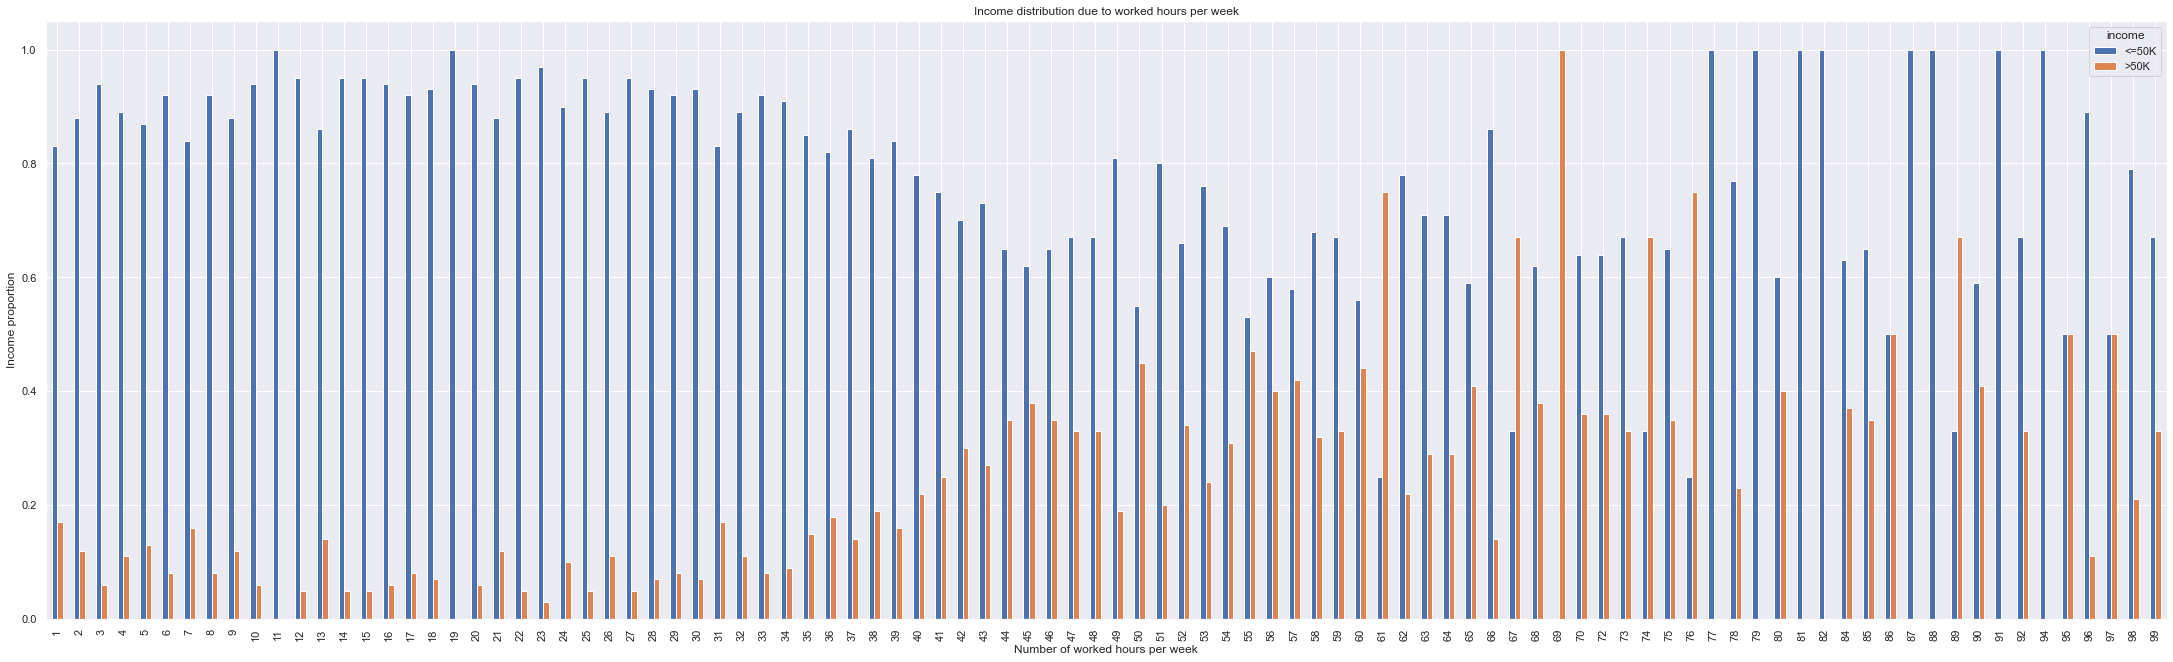

In [13]:
sns.set(rc={'figure.figsize':(38,11)}) # increase the size
bar_plt = round(pd.crosstab(adultdf['hours-per-week'], adultdf.income).div(pd.crosstab(adultdf['hours-per-week'], adultdf.income).apply(sum,1),0),2)
#bar_plt.sort_values(by = '<=50K', inplace = True) if want to show the 'hours-per-week' with highest income first
ax = bar_plt.plot(kind ='bar', title = 'Income distribution due to worked hours per week')
ax.set_xlabel('Number of worked hours per week')
ax.set_ylabel('Income proportion')

#### Number of worked hours per week at certain age - lineplot

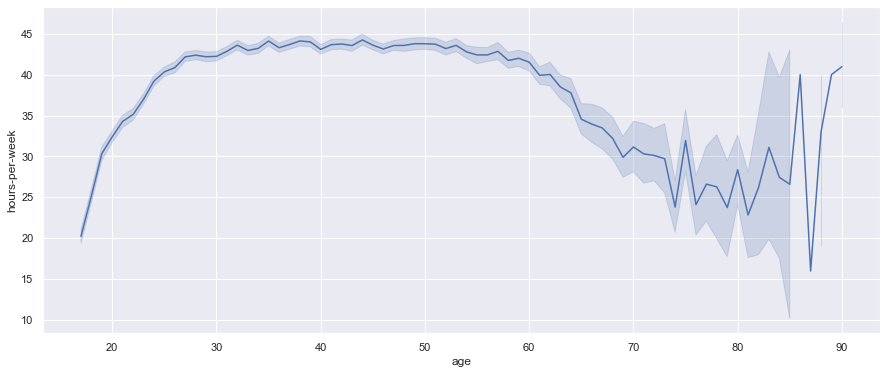

In [14]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.lineplot(x='age', y='hours-per-week', data = adultdf);

In [15]:
'''Splitting hours per week into categories'''
age_cat = []

for i in adultdf['hours-per-week']:
    if i < 31:
        age_cat.append('up to 30')
    elif i > 30 and i < 41:
        age_cat.append('30-40')
    elif i > 40 and i < 61:
        age_cat.append('40-60')
    else:
        age_cat.append('above 60')
        
adultdf['hours-per-week-cat'] = age_cat

In [16]:
adultdf.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'hours-per-week', 'native-country', 'income', 'hours-per-week-cat'],
      dtype='object')

In [17]:
'''Removing/dropping irrelevant columns'''
#inplace in drop method: to remove selected columns/data permanently
adultdf.drop(['fnlwgt','educational-num','hours-per-week'], axis = 1, inplace = True) 
adultdf.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,hours-per-week-cat
0,25,Private,up to secondary,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K,30-40
1,38,Private,high school,Married,Farming-fishing,Husband,White,Male,United-States,<=50K,40-60
2,28,gov-public,higher,Married,Protective-serv,Husband,White,Male,United-States,>50K,30-40
3,44,Private,higher,Married,Machine-op-inspct,Husband,Black,Male,United-States,>50K,30-40
5,34,Private,up to secondary,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K,up to 30


# Plotting transformated data vs Income


#### 1. Age vs Income

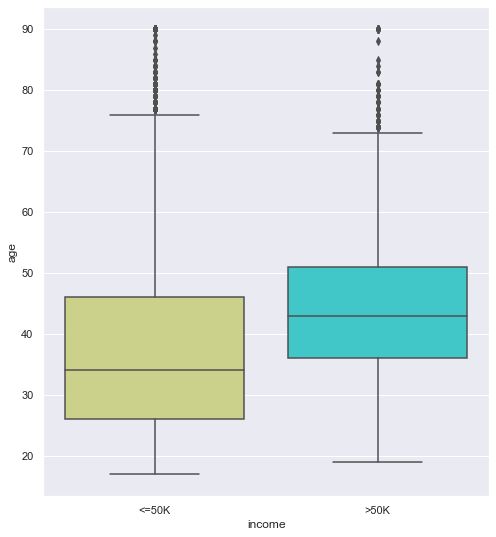

The meadian for age is:  37.0


In [18]:
fig = plt.figure(figsize=(8,9)) 
sns.boxplot(x="income", y="age",palette="rainbow_r", data=adultdf)
plt.show()
print('The meadian for age is: ',adultdf.age.median())

Text(0, 0.5, 'Age of the person')

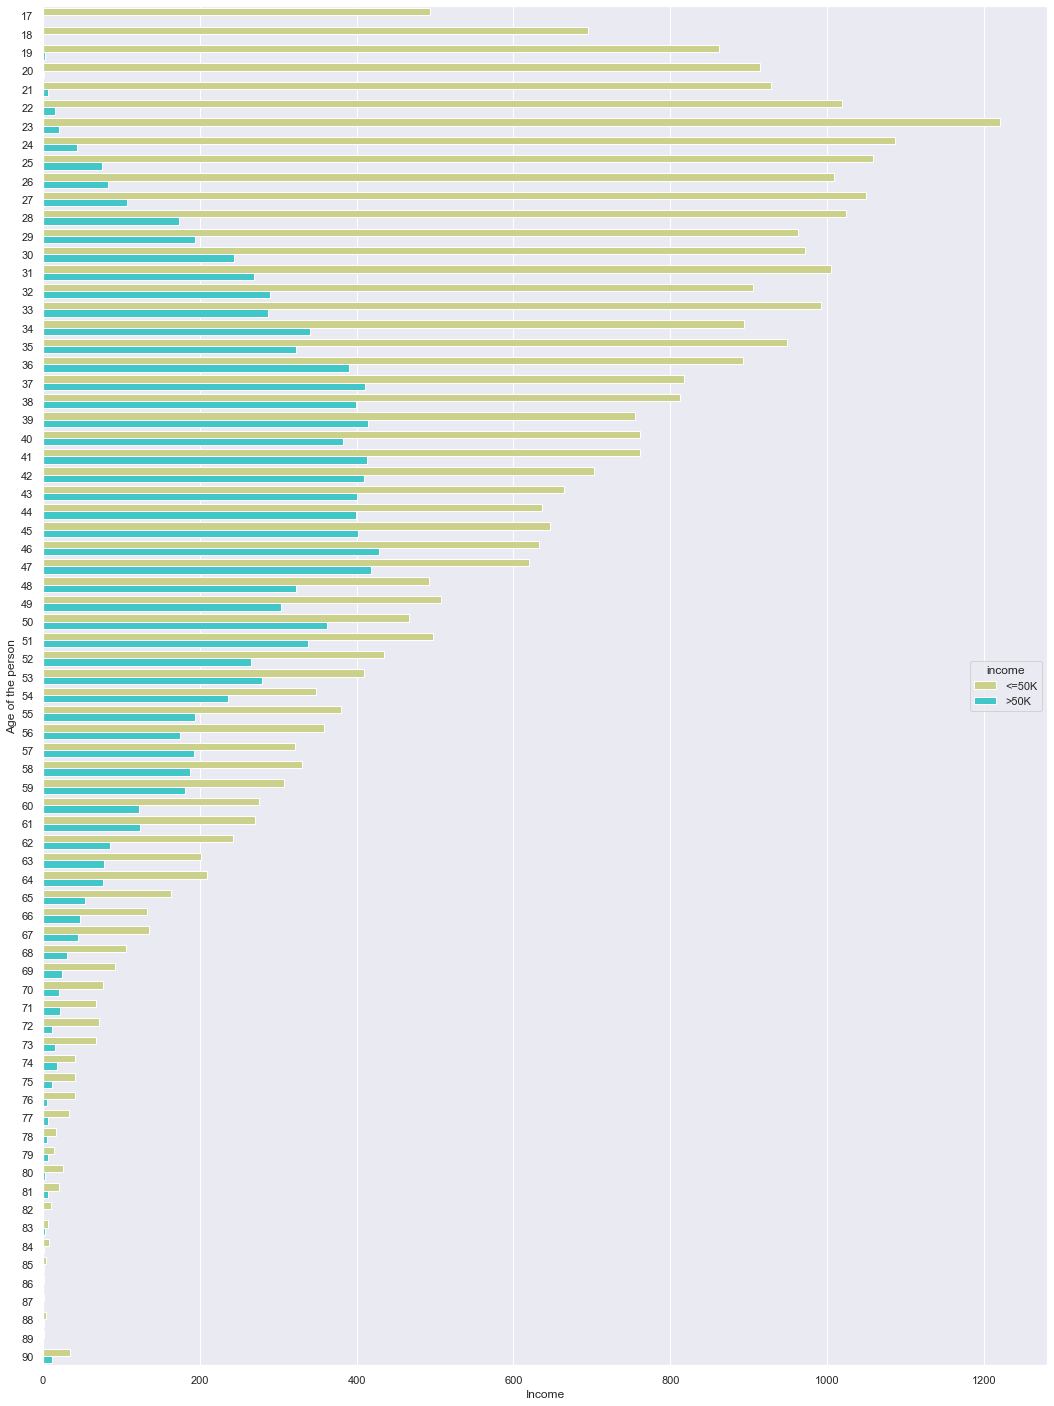

In [19]:
plt.figure(figsize=(18,25))
ax=sns.countplot(y="age", hue="income",palette="rainbow_r",data=adultdf)
ax.set_xlabel('Income')
ax.set_ylabel('Age of the person')

#### 2. Workclass vs Income

Text(0, 0.5, 'Income')

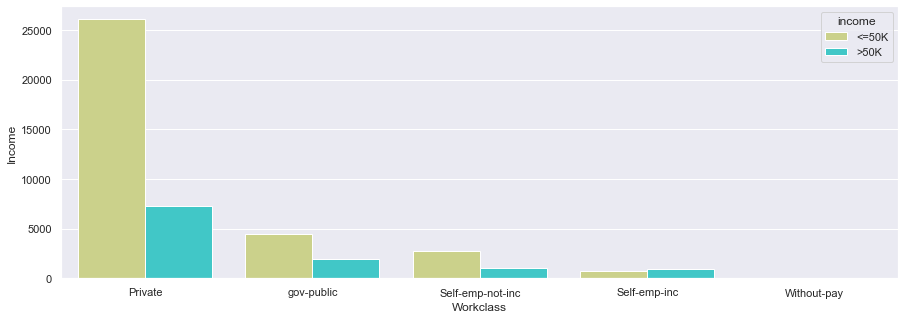

In [20]:
sns.set(rc={'figure.figsize':(15,5)}) # increase the size
ax=sns.countplot(adultdf['workclass'], palette='rainbow_r',hue='income', data=adultdf, hue_order=['<=50K','>50K'])
ax.set_xlabel('Workclass')
ax.set_ylabel('Income')

#### 3. Education vs Income

Text(0, 0.5, 'Income')

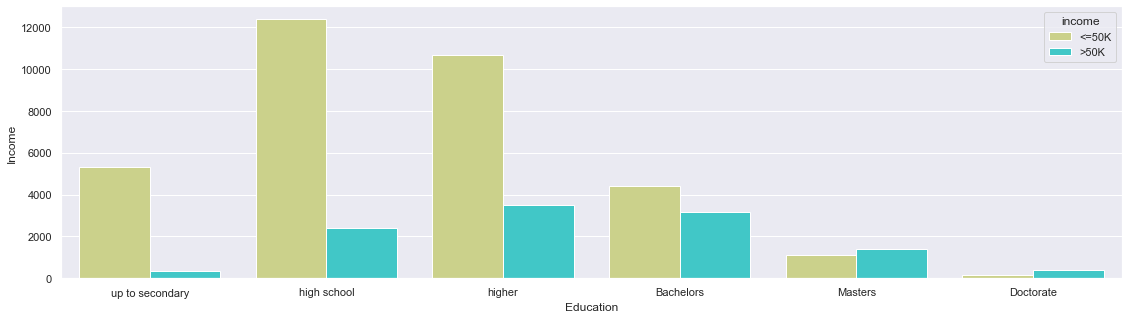

In [21]:
sns.set(rc={'figure.figsize':(19,5)}) # increase the size
ax=sns.countplot(adultdf['education'], palette='rainbow_r',hue='income', data=adultdf, hue_order=['<=50K','>50K'])
ax.set_xlabel('Education')
ax.set_ylabel('Income')

#### 4. Marital-status vs Income

Text(0, 0.5, 'Income')

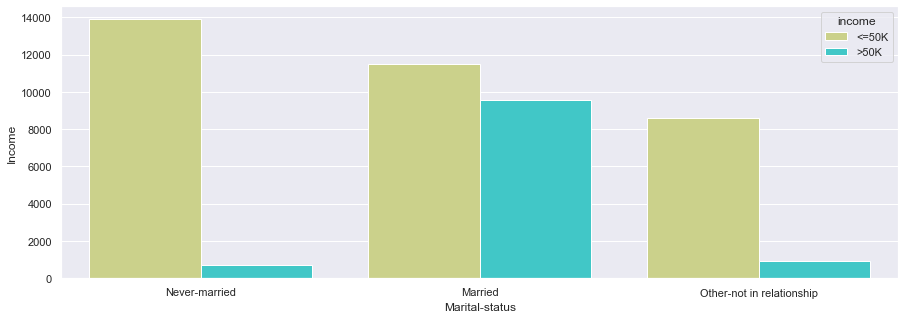

In [22]:
sns.set(rc={'figure.figsize':(15,5)}) # increase the size
ax = sns.countplot(adultdf['marital-status'], palette='rainbow_r',hue='income', data=adultdf,hue_order=['<=50K','>50K'])
ax.set_xlabel('Marital-status')
ax.set_ylabel('Income')

#### 5. Occupation vs Income

Text(0, 0.5, 'Occupation')

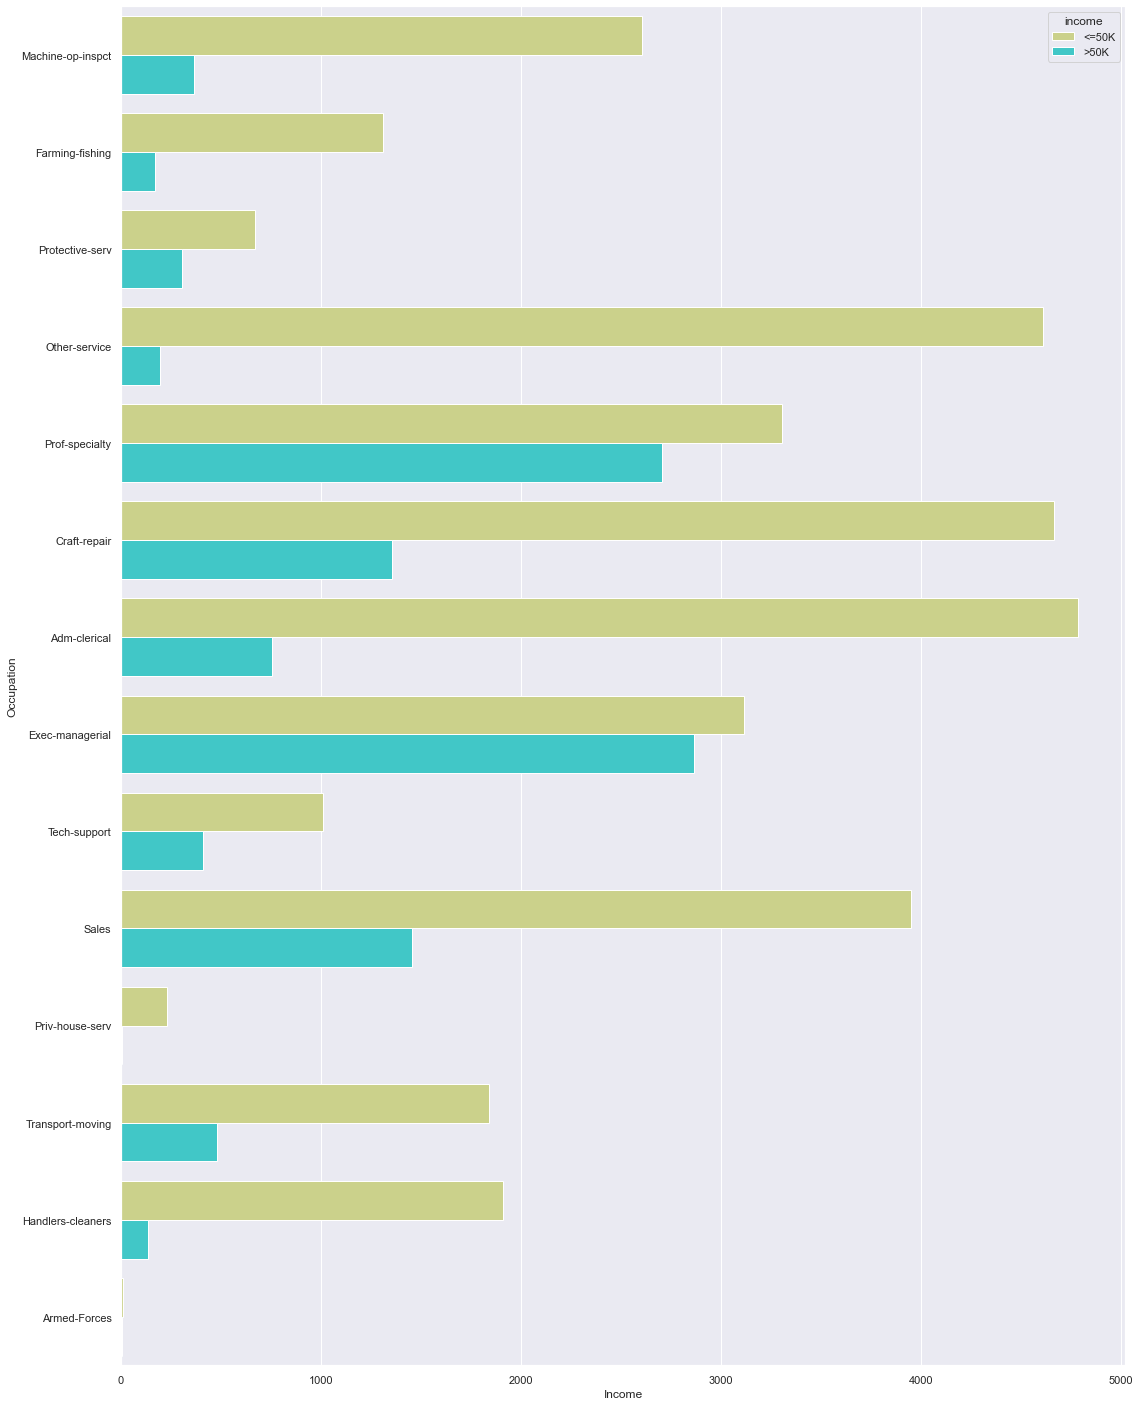

In [23]:
plt.figure(figsize=(18,25))
ax=sns.countplot(y="occupation", hue="income",palette="rainbow_r",data=adultdf)
ax.set_xlabel('Income')
ax.set_ylabel('Occupation')

#### 6. Relationship vs Income

Text(0, 0.5, 'Income')

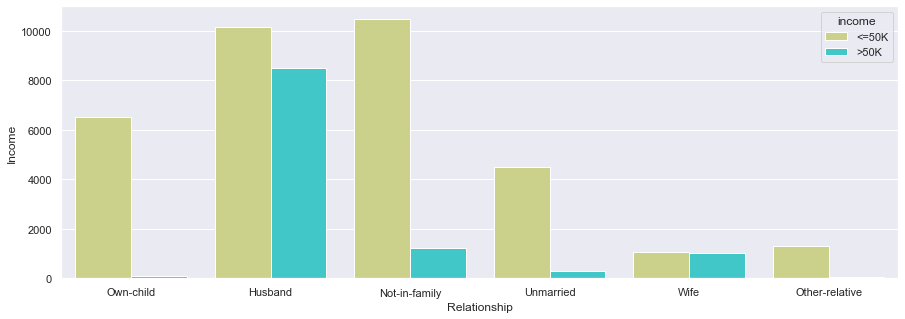

In [24]:
sns.set(rc={'figure.figsize':(15,5)}) # increase the size
ax = sns.countplot(adultdf['relationship'], palette='rainbow_r',hue='income', data=adultdf,hue_order=['<=50K','>50K'])
ax.set_xlabel('Relationship')
ax.set_ylabel('Income')

#### 7. Race vs Income

Text(0, 0.5, 'Income')

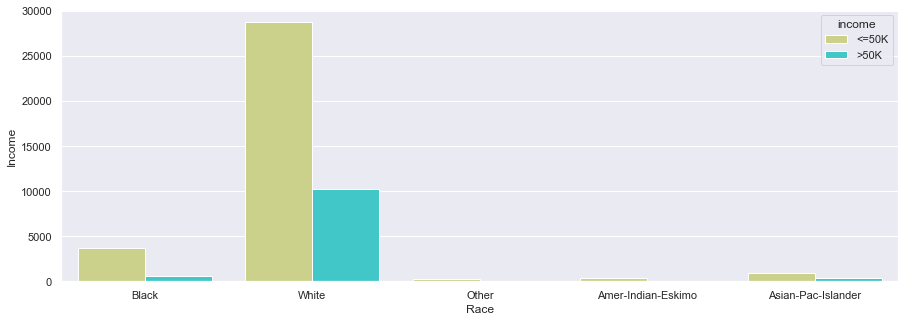

In [25]:
sns.set(rc={'figure.figsize':(15,5)}) # increase the size
ax = sns.countplot(adultdf['race'], palette='rainbow_r',hue='income', data=adultdf,hue_order=['<=50K','>50K'])
ax.set_xlabel('Race')
ax.set_ylabel('Income')

#### 8. Gender vs Income

Text(0, 0.5, 'Income')

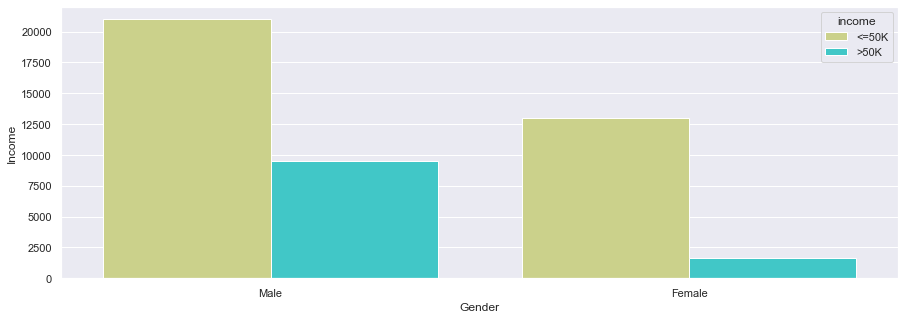

In [26]:
sns.set(rc={'figure.figsize':(15,5)}) # increase the size
ax = sns.countplot(adultdf['gender'], palette='rainbow_r',hue='income', data=adultdf,hue_order=['<=50K','>50K'])
ax.set_xlabel('Gender')
ax.set_ylabel('Income')

#### 8. Native country vs Income

Text(0, 0.5, 'Income proportion')

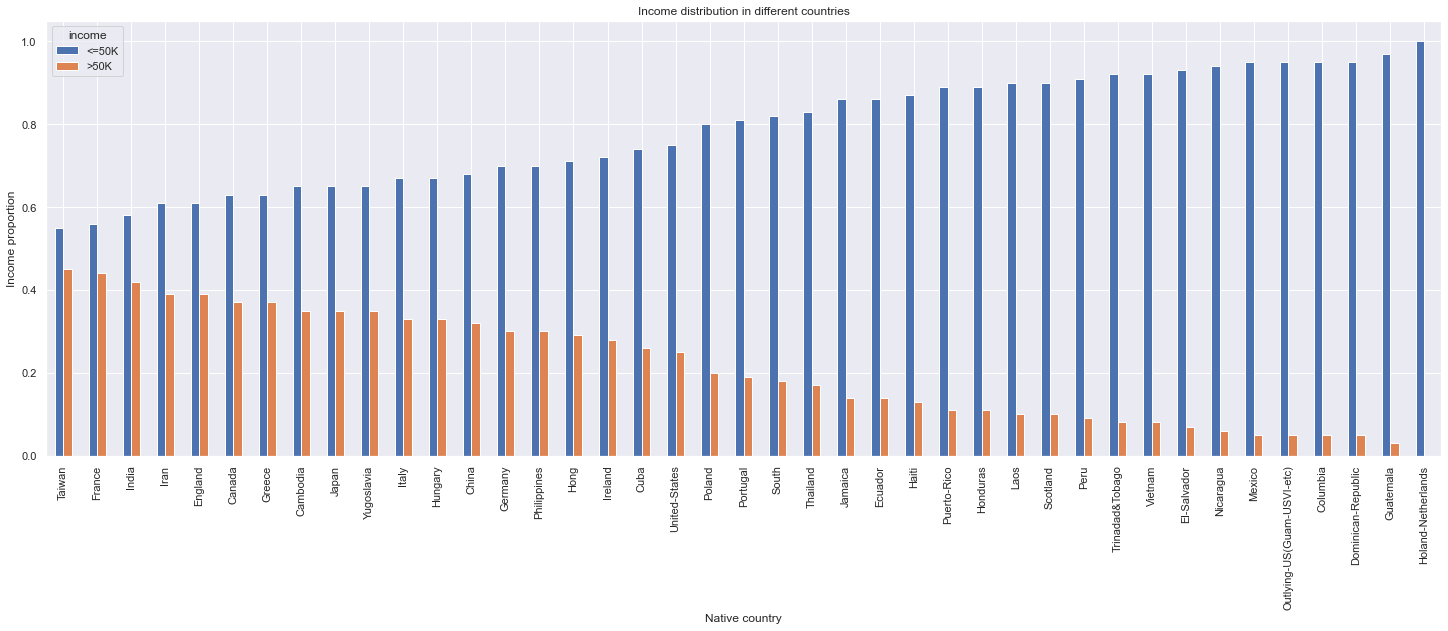

In [27]:
sns.set(rc={'figure.figsize':(25,8)}) # increase the size
bar_plt = round(pd.crosstab(adultdf['native-country'], adultdf.income).div(pd.crosstab(adultdf['native-country'], adultdf.income).apply(sum,1),0),2)
bar_plt.sort_values(by = '<=50K', inplace = True)
ax = bar_plt.plot(kind ='bar', title = 'Income distribution in different countries')
ax.set_xlabel('Native country')
ax.set_ylabel('Income proportion')

#### 9. Categorised number of worked hours per week vs Income

Text(0, 0.5, 'Income proportion')

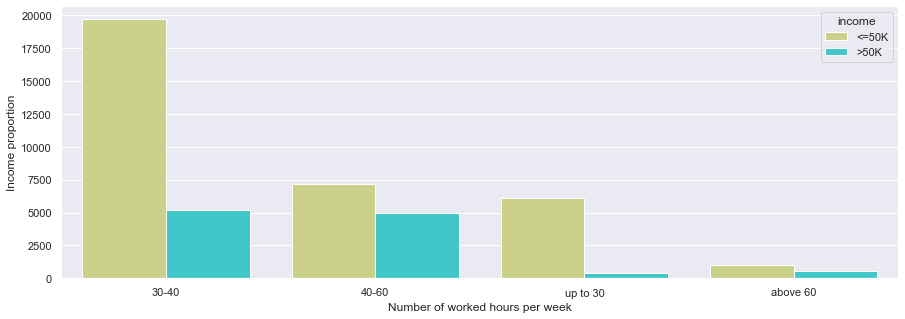

In [28]:
sns.set(rc={'figure.figsize':(15,5)}) # increase the size
ax=sns.countplot(adultdf['hours-per-week-cat'], palette='rainbow_r',hue='income', data=adultdf,hue_order=['<=50K','>50K'])
ax.set_xlabel('Number of worked hours per week')
ax.set_ylabel('Income proportion')

## Converting categorical values into numerical

In [29]:
print("Dataset before conversion categorical values into numerical:")
adultdf.head(5)

Dataset before conversion categorical values into numerical:


,age,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,hours-per-week-cat
0,25,Private,up to secondary,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K,30-40
1,38,Private,high school,Married,Farming-fishing,Husband,White,Male,United-States,<=50K,40-60
2,28,gov-public,higher,Married,Protective-serv,Husband,White,Male,United-States,>50K,30-40
3,44,Private,higher,Married,Machine-op-inspct,Husband,Black,Male,United-States,>50K,30-40
5,34,Private,up to secondary,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K,up to 30


In [30]:
'''Converting categorical values/columns into numerical by using sklearn fit_transform() function
instead pandas get_dummies()'''

from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

for col in adultdf.columns:
    if adultdf[col].dtypes == 'object': # looking for 'object'=categorical datatimes in all the columns
        transform = enc.fit_transform(adultdf[col]) #fit_transform is fitting label encoder and return encoded labels
        adultdf[col] = transform # every categorical column converts into numerical

#### The histogram of converted data

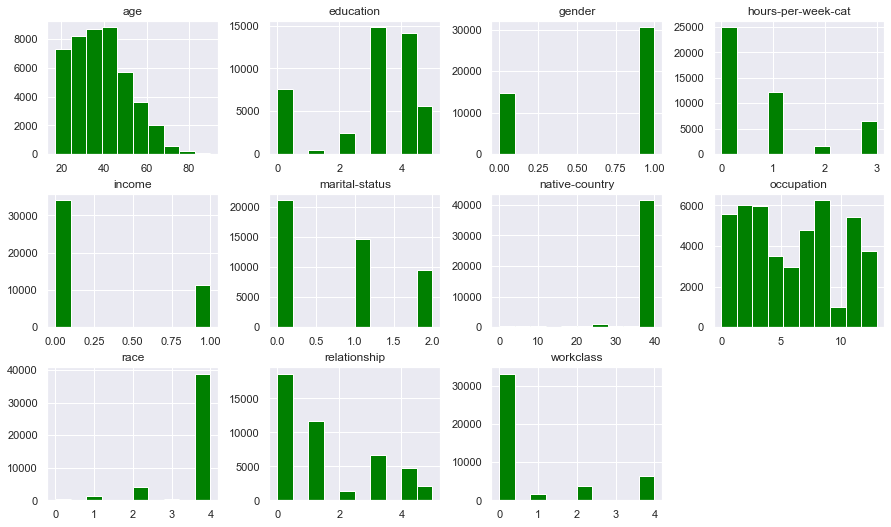

In [31]:
sns.set(rc={'figure.figsize':(15,12)}) # increase the size
adultdf.hist(layout=(4,4), color='green');

#### Additional lineplot of age vs income

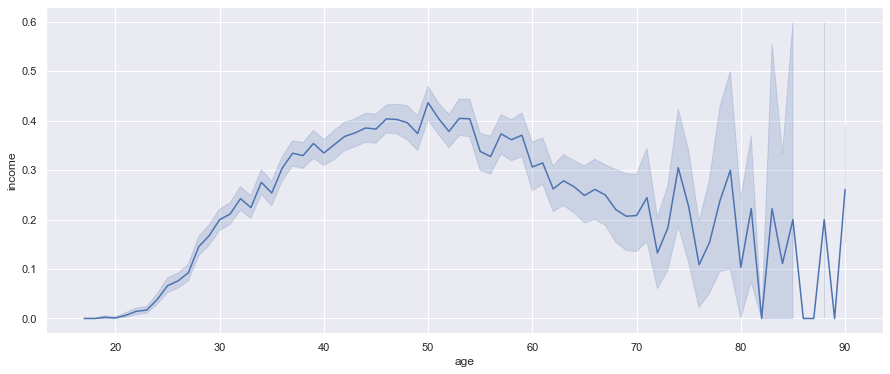

In [32]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.lineplot(x='age', y='income', data = adultdf);

In [33]:
'''To double check if the dataset is converted correctly'''
# adultdf.dtypes
# adultdf.isnull().sum()
# adultdf.describe()
adultdf.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,hours-per-week-cat
0,25,0,5,1,6,3,2,1,38,0,0
1,38,0,3,0,4,0,4,1,38,0,1
2,28,4,4,0,10,0,4,1,38,1,0
3,44,0,4,0,6,0,2,1,38,1,0
5,34,0,5,1,7,1,4,1,38,0,3


In [34]:
adultdf.corr() #Correlation matrix. Shows the same what heatmap but in tabular form

,age,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,hours-per-week-cat
age,1.000000,0.155335,-0.051065,-0.075017,-0.004474,-0.247564,0.023776,0.082053,-0.003180,0.237040,-0.067446
workclass,0.155335,1.000000,-0.105025,-0.036880,0.005428,-0.037705,-0.040819,0.005885,0.040553,0.081090,-0.020839
education,-0.051065,-0.105025,1.000000,0.078958,-0.063338,0.093883,-0.026990,-0.022806,-0.039620,-0.242030,0.058977
marital-status,-0.075017,-0.036880,0.078958,1.000000,-0.038792,0.476834,-0.080206,-0.450681,0.003932,-0.378839,0.035155
occupation,-0.004474,0.005428,-0.063338,-0.038792,1.000000,-0.051644,-0.000026,0.056625,-0.002848,0.049787,0.092987
relationship,-0.247564,-0.037705,0.093883,0.476834,-0.051644,1.000000,-0.118584,-0.582974,-0.007144,-0.253402,0.099078
race,0.023776,-0.040819,-0.026990,-0.080206,-0.000026,-0.118584,1.000000,0.088935,0.124342,0.070844,0.048450
gender,0.082053,0.005885,-0.022806,-0.450681,0.056625,-0.582974,0.088935,1.000000,-0.004170,0.215760,-0.077216
native-country,-0.003180,0.040553,-0.039620,0.003932,-0.002848,-0.007144,0.124342,-0.004170,1.000000,0.020103,0.020499
income,0.237040,0.081090,-0.242030,-0.378839,0.049787,-0.253402,0.070844,0.215760,0.020103,1.000000,-0.059594


# Heat map of processed data

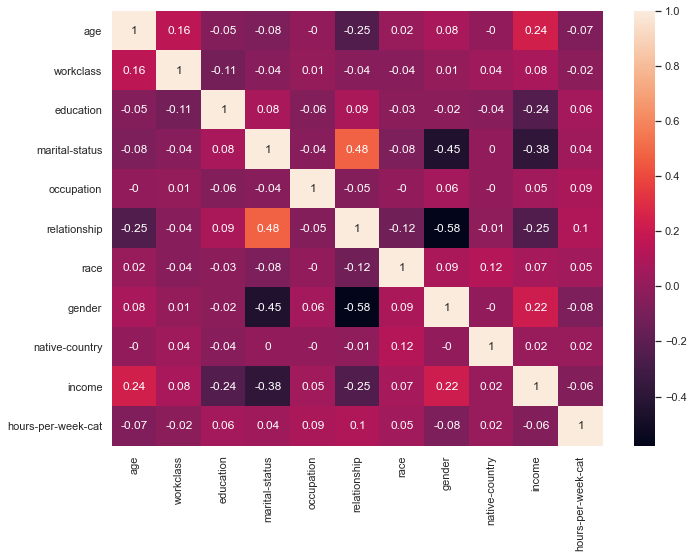

In [35]:
plt.figure(figsize = (11,8)) #changing the default size
correlation_matrix = adultdf.corr().round(2)
sns.heatmap(data = correlation_matrix, annot=True)

# 2. Applying Machine Learning models

#### Building the model

In [36]:
X = adultdf.drop('income', axis=1)
y = adultdf['income']
print(X.shape)
print(y.shape)
#print(X.head()) #to make sure that taking correct data
#print(y.head())

(45222, 10)
(45222,)


### Principal Component Analysis

In [37]:
'''Principal Component Analysis to reduce high dimention data into
two dimention dataset - allows to plot the data'''

sc = StandardScaler() #instance of the class/required before applying PCA
X_PCA = sc.fit_transform(X)

In [38]:
pca = PCA(n_components=2) #n_components for defining how many pronciple components want to keep
pComponents = pca.fit_transform(X_PCA)
pDF = pd.DataFrame(data=pComponents, columns=['pc1','pc2']) #create dataframe for new principle component

'''Add the lable to the sample'''
'''Join created data (X) with original target/y dataframe'''
df = adultdf
df = pd.concat([pDF, y], axis=1) #axis=1 to specify to concatinate by collumns
df.head() #new 2D dataset 

,pc1,pc2,income
0,1.002950,-0.577355,0.0
1,-1.320115,-0.769037,0.0
2,-1.498719,0.472786,1.0
3,-1.142652,0.099843,1.0
4,0.083470,-1.921715,NaN


In [39]:
'''Having null values, therefore impossible to make a plot'''
df.isnull().sum()

pc1       3339
pc2       3339
income    3339
dtype: int64

In [40]:
'''Dropping all missing values to could process PCA dataset further'''
df.dropna(how='any', inplace=True)
print("\nNaN/missing values after dropping rows\n",df.isnull().sum())


NaN/missing values after dropping rows
 pc1       0
pc2       0
income    0
dtype: int64


### Scatter plot for PCA to check if useful 

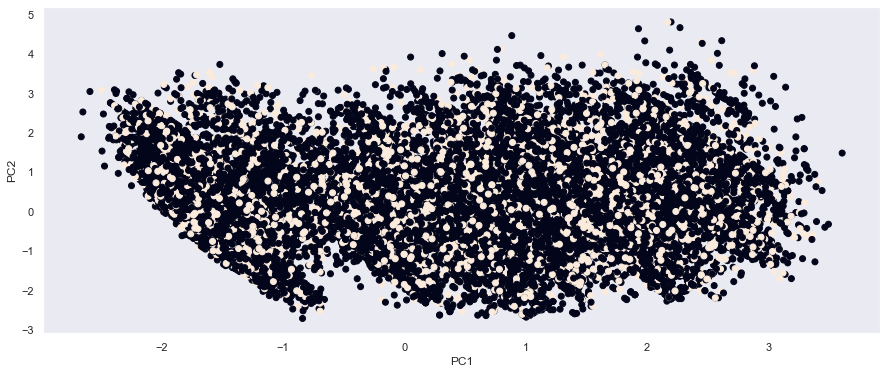

In [41]:
x = df['pc1']
x2 = df['pc2']
y2 = df.income

plt.scatter(x,x2,c=y2)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.grid()
plt.show()

In [42]:
xt = df.iloc[:,:-1].values
yt = df.iloc[:,-1].values

### Checking KNeighbours Classifier accuracy with optimal parameters for Principal Component Analysis 

In [43]:
'''The optimal parameters for KNN model were found in further section by implementing GridSearchCV library function'''
starttime = timeit.default_timer()

'''Splitting the data in two subsets: training and testing sets'''
X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.25, random_state = 0)

'''n_neighbors parameter is defining how many nearest neighbours
the model is taking into consideration for classification/predicting 
new samples'''
model_KNC = KNeighborsClassifier(n_neighbors=16, n_jobs=-1, weights='uniform')
model_KNC.fit(X_train, y_train)
y_pred = model_KNC.predict(X_test)
accuracy = model_KNC.score(X_test, y_test)

print("The execution time for this part of code is {:.2f}".format(timeit.default_timer() - starttime), "s")
print("Model accuracy for KNeighborsClassifier: {:.2f}".format(accuracy*100), "%") #Shows accuracy in %

The execution time for this part of code is 0.92 s
Model accuracy for KNeighborsClassifier: 74.85 %


## Initializing MinMaxScaler, StandardScaler, RobustScaler for further usage and comparison

In [44]:
'''Each Scaler will scale the features in different way
Want to check which will perform the best with different ML models'''
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

mm_scl = MinMaxScaler() #instance of the class
X_MMs = mm_scl.fit_transform(X) #initializing "new" variable X to store scaled features

stdn_scl = StandardScaler() #instance of the class
X_Ss = stdn_scl.fit_transform(X) #initializing "new" variable X to store scaled features

robust_scl = RobustScaler() #instance of the class
X_RBSTs = robust_scl.fit_transform(X) #initializing "new" variable X to store scaled features

# Checking performance/accuracy of linear models in classification problem (non linear)

### PolynomialFeatures for LinearRegression, Ridge & Lasso models

In [45]:
'''Applying PolynomialFeatures with scaled in MinMaxScaler features to use it further in Linear Regression model'''
from sklearn.preprocessing import PolynomialFeatures

'''High degrees can cause overfitting'''
X_two = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_MMs) #generate all the products between scaled features
y_two = y   
X_two.shape #dataset is expanded/scaled now from 10 to 285 features for degree = 3 

(45222, 285)

### Linear Regression model - to check its performance in non linear problem/to compare it with more suitable to classification problem models

In [46]:
'''Applying Linear Regression model only to check performance and comprare its accuracy with different models,
which are more suitable to classification problem'''

from sklearn.linear_model import LinearRegression
starttime = timeit.default_timer()

'''Splitting the data in two subsets: training and testing sets'''
X_train, X_test, y_train, y_test = train_test_split(X_two, y_two, test_size = 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #Number of features expadns after applying Polynomial Features

model_LnR = LinearRegression() #create an instant of Linear Regression
model_LnR.fit(X_train, y_train) #train new model with the Features and target
print("Linear Regression model:")
print("training score: {:.3f}".format(model_LnR.score(X_train, y_train)))
print("testing score: {:.3f}".format(model_LnR.score(X_test, y_test)))
print("\nThe execution time for this part of code is {:.2f}".format(timeit.default_timer() - starttime), "s")

(33916, 285) (11306, 285) (33916,) (11306,)
Linear Regression model:
training score: 0.337
testing score: 0.324

The execution time for this part of code is 0.68 s


### Ridge model

In [47]:
'''Applying regularization model to improve accuracy 
The same as above, used only to check performance and comprare its accuracy with different models,
which are more suitable to classification problem'''
#1. Ridge for linear Regression model. Usualy used to prevent overfit
from sklearn.linear_model import Ridge
starttime = timeit.default_timer()

'''default alpha = 1.0, Regularization strength improves the conditioning 
of the problem and reduces the variance of the estimates.'''
model_Ridge = Ridge(alpha=0.5) #creating instant of Ridge model
model_Ridge.fit(X_train, y_train) #train the model with training set
print("Ridge model:")
print("training score: {:.3f}".format(model_Ridge.score(X_train, y_train)))
print("testing score: {:.3f}".format(model_Ridge.score(X_test, y_test)))
print("Number of features in Ridge model: ", np.sum(model_Ridge.coef_ !=0))
print("\nThe execution time for this part of code is {:.2f}".format(timeit.default_timer() - starttime), "s")

Ridge model:
training score: 0.335
testing score: 0.323
Number of features in Ridge model:  285

The execution time for this part of code is 0.21 s


In [48]:
'''The same as above, used only to check performance and comprare its accuracy with different models,
which are more suitable to classification problem'''
#2. Lasso for linear Regression model. Alternative to Ridge
#It's also trying to minimize the coefficient and predict well
from sklearn.linear_model import Lasso
starttime = timeit.default_timer()

'''default alpha = 1.0, '''
model_Lasso = Lasso(alpha=0.0001, max_iter=4200) #creating instant of Lasso model
model_Lasso.fit(X_train, y_train) #train the model with training set
print("Lasso model:")
print("training score: {:.3f}".format(model_Lasso.score(X_train, y_train)))
print("testing score: {:.3f}".format(model_Lasso.score(X_test, y_test)))
print("Number of features in Lasso model: ", np.sum(model_Lasso.coef_ !=0))
print("\nThe execution time for this part of code is {:.1f}".format(timeit.default_timer() - starttime), "s")

Lasso model:
training score: 0.320
testing score: 0.312
Number of features in Lasso model:  103

The execution time for this part of code is 20.7 s


# Applying classification problem models

### Logistic Regression model before tuning parameters

In [49]:
'''Splitting the data in two subsets: training and testing sets'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  
#test size = how many of data set is for test. The remainder is for the training set.

In [50]:
'''Build the logistic Regression model without tuning its parameters and using not scaled dataset'''
starttime = timeit.default_timer()

model_LR = LogisticRegression(max_iter = 300) #max_iter to define the number of max iteration
model_LR.fit(X_train, y_train) #sklearn method to train the model

'''Next step is to predict the result for the test set'''
y_test_pred = model_LR.predict(X_test)    #storing the prediction of the model for test set
y_train_pred = model_LR.predict(X_train)  #prediction of the model
'''Comparing the results of testing sets'''
print("Actual labels   :\n", y_test.head(5))
print("\nPredicted labels:\n", y_test_pred[0:5])
accuracyLR1 = model_LR.score(X_test, y_test)
print("\nModel accuracy: {:.2f}".format(accuracyLR1*100), "%") #Shows accuracy in %
time_LR1 = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_LR1), "s")

Actual labels   :
 44688    0
38106    0
29131    0
31472    1
45120    0
Name: income, dtype: int32

Predicted labels:
 [0 0 0 0 0]

Model accuracy: 78.35 %

The execution time for this part of code is 0.80 s


##### Changing the treshold value to try improve model accuracy

In [51]:
starttime = timeit.default_timer()

defaultT = 0.50    #Value of default threshold
newT = 0.48     #Defining new threshold 0.48 is slightly better than default one
'''[:,1] in the code give the probabilities of getting the output as 1'''
y_test_pred_new = np.where(model_LR.predict_proba(X_test)[:,1]>newT,1,0)

'''model.predict_proba() first column: probability of getting 0
second column: probability of getting 1'''
print("Predict probability model: \n",model_LR.predict_proba(X_test.head(10)))
print("Actual labels:\n",y_test[0:15])
print("Predicted labels:\n",y_test_pred[0:10])
print("New predicted labels:\n",y_test_pred_new[0:15])
accuracyLRNtresh = accuracy_score(y_test, y_test_pred_new) #used instead model.score(X_test, y_test_pred_new)
print("\nModel accuracy for new treshold: {:.2f}".format(accuracyLRNtresh*100), "%") #Shows accuracy in %
time_LRNtresh = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_LRNtresh), "s")

Predict probability model: 
 [[0.96325935 0.03674065]
 [0.9419479  0.0580521 ]
 [0.76136464 0.23863536]
 [0.94608277 0.05391723]
 [0.90675501 0.09324499]
 [0.97963499 0.02036501]
 [0.98207487 0.01792513]
 [0.57519509 0.42480491]
 [0.14869718 0.85130282]
 [0.97920264 0.02079736]]
Actual labels:
 44688    0
38106    0
29131    0
31472    1
45120    0
42921    0
35372    0
6516     1
46463    1
13438    0
39637    0
16532    0
6236     0
11884    0
19234    0
Name: income, dtype: int32
Predicted labels:
 [0 0 0 0 0 0 0 0 1 0]
New predicted labels:
 [0 0 0 0 0 0 0 0 1 0 0 1 0 1 1]

Model accuracy for new treshold: 78.43 %

The execution time for this part of code is 0.02 s


#### Comparing two for logistic regression models: with default treshold and changed one by using evaluation metrics

In [52]:
from sklearn.metrics import classification_report
target_names=["<=50K",">50K"]

cReport = classification_report(y_test, y_test_pred, target_names=target_names)
print("Classification report for linear regression model with DEAFULT treshold value\n",cReport)

cReport=classification_report(y_test, y_test_pred_new , target_names = target_names)
print("Classification report for linear regression model with NEW (",newT,") treshold value\n",cReport)

Classification report for linear regression model with DEAFULT treshold value
               precision    recall  f1-score   support

       <=50K       0.82      0.91      0.86      8467
        >50K       0.60      0.40      0.48      2839

    accuracy                           0.78     11306
   macro avg       0.71      0.66      0.67     11306
weighted avg       0.77      0.78      0.77     11306

Classification report for linear regression model with NEW ( 0.48 ) treshold value
               precision    recall  f1-score   support

       <=50K       0.83      0.90      0.86      8467
        >50K       0.60      0.43      0.50      2839

    accuracy                           0.78     11306
   macro avg       0.71      0.67      0.68     11306
weighted avg       0.77      0.78      0.77     11306



### Support Vector Machines

In [53]:
starttime = timeit.default_timer()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model_SVM = SVC(max_iter=-1)
model_SVM.fit(X_train, y_train)
y_test_pred = model_SVM.predict(X_test)
accuracySVM = model_SVM.score(X_test, y_test)
print("Model accuracy for Support Vector Machines: {:.2f}".format(accuracySVM*100), "%") #Shows accuracy in %
time_SVM = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.1f}".format(time_SVM), "s")

Model accuracy for Support Vector Machines: 78.77 %

The execution time for this part of code is 27.5 s


### KNeighborsClassifier model before tuning parameters

In [54]:
starttime = timeit.default_timer()

'''n_neighbors parameter is defining how many nearest neighbours
the model is taking into consideration for classification/predicting 
new samples'''
model_KNC = KNeighborsClassifier(n_neighbors=1)
model_KNC.fit(X_train, y_train)
y_pred = model_KNC.predict(X_test)
accuracyKNC1 = model_KNC.score(X_test, y_test)
print("Model accuracy for KNeighborsClassifier: {:.2f}".format(accuracyKNC1*100), "%") #Shows accuracy in %
time_KNC1 = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_KNC1), "s")

Model accuracy for KNeighborsClassifier: 76.84 %

The execution time for this part of code is 2.02 s


### Multi-layer perception classifier model before tuning parameters

In [55]:
starttime = timeit.default_timer()

#model_one = MLPClassifier(verbose = 10)
'''Multi-layer Perceptron classifier'''
'''default solver 'adam' performs better for big datasets '''
model_MLP = MLPClassifier(max_iter=350)
model_MLP.fit(X_train, y_train)
train_score = model_MLP.score(X_train, y_train)
accuracyMLP1 = model_MLP.score(X_test, y_test)
print(f'Training test accuracy: {train_score:.1%}\nTesting test accuracy: {accuracyMLP1:.1%}')
time_MLP1 = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.1f}".format(time_MLP1), "s")

Training test accuracy: 82.9%
Testing test accuracy: 81.9%

The execution time for this part of code is 64.4 s


### Random Forest Classifier model

In [56]:
starttime = timeit.default_timer()

model_RFC = RandomForestClassifier(n_jobs=-1)
model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)
accuracyRFC1 = model_RFC.score(X_test, y_test)
print("Model accuracy for Random Forest Classifier: {:.2f}".format(accuracyRFC1*100), "%") #Shows accuracy in %
time_RFC1 = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_RFC1), "s")

Model accuracy for Random Forest Classifier: 80.49 %

The execution time for this part of code is 1.06 s


### Decision Tree Classifier model

In [57]:
starttime = timeit.default_timer()

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)
y_pred = model_DTC.predict(X_test)
accuracyDTC1 = model_DTC.score(X_test, y_test)
print("Model accuracy for Decision Tree Classifier: {:.2f}".format(accuracyDTC1*100), "%")
time_DTC1 = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_DTC1), "s")

Model accuracy for Decision Tree Classifier: 78.19 %

The execution time for this part of code is 0.12 s


### Grid Search Cross Validation function (basic) for KNeighbors

In [58]:
'''Searching for multiple hyperparameters at the same time by using GridSearchCV'''
'''It will replace the for loop and add some other functionalities'''

n_range = list(range(1,21))#list of values to try/check as a hyperparameters for KNN
para_grid = dict(n_neighbors=n_range) #python dictionary, keys: parameter name, values: values (list) to try/check
print(para_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [59]:
model_KNC = KNeighborsClassifier()

'''Implementing Grid Search Cross Validation
It performs exhaustive search'''
starttime = timeit.default_timer()

'''parameters(1:model which we want to use GSCV
2: para_grid dictionary
3: number of folds/repeats for CV-every result will be stored in variable
4: for classifier method/classification accuracy as an evaluation matrix)
5: implementing parallel processing by changing deafult n_jobs = None to -1, which activate all available CPU cores
6: return_train_score=False CV results won't include train scores
This step repeats fold cross validation process 3 times (para_grid) 
for 20 different values n_neighbours parameters'''
grid_one = GridSearchCV(model_KNC, para_grid, cv=3, scoring='accuracy', n_jobs=-1 ,return_train_score=False) #creating instance of the model
grid_one.fit(X,y) #train the grid with given dataset
grid_one_time = timeit.default_timer() - starttime
print("The execution time for this part of code is {:.1f}".format(grid_one_time), "s")

The execution time for this part of code is 58.3 s


In [60]:
#the average scores for each iteration
pd.DataFrame(grid_one.cv_results_).head() #Good to convert into dataframe 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.368186,0.132508,2.686773,0.045707,1,{'n_neighbors': 1},0.764893,0.765225,0.771660,0.767259,0.003115,20
1,1.479421,0.068933,3.085205,0.148778,2,{'n_neighbors': 2},0.789439,0.788245,0.788178,0.788621,0.000579,19
2,1.247892,0.239590,3.263539,0.214142,3,{'n_neighbors': 3},0.787648,0.791562,0.797399,0.792203,0.004007,18
3,0.959434,0.074183,3.154289,0.109198,4,{'n_neighbors': 4},0.794879,0.802508,0.799721,0.799036,0.003152,17
4,0.856045,0.018467,3.381681,0.060416,5,{'n_neighbors': 5},0.795741,0.803237,0.807350,0.802110,0.004806,16


In [61]:
pd.DataFrame(grid_one.cv_results_)[['mean_test_score','params']] #to get only mean_test_score and number of n_neighbors (params) 

,mean_test_score,params
0,0.767259,{'n_neighbors': 1}
1,0.788621,{'n_neighbors': 2}
2,0.792203,{'n_neighbors': 3}
3,0.799036,{'n_neighbors': 4}
4,0.802110,{'n_neighbors': 5}
5,0.806068,{'n_neighbors': 6}
6,0.806355,{'n_neighbors': 7}
7,0.807859,{'n_neighbors': 8}
8,0.806952,{'n_neighbors': 9}
9,0.809540,{'n_neighbors': 10}


#### Giving a plot of all GridSearchCV accuracy values for defined numbers of neighbours (for KNN) 

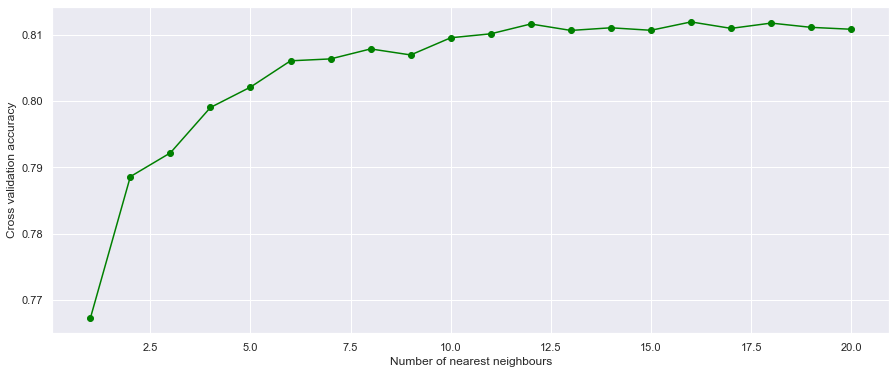

In [62]:
y_plt = pd.DataFrame(grid_one.cv_results_)[['mean_test_score']]
#or y_plt = grid.cv_results_['mean_test_score']
x=n_range 

plt.plot(x, y_plt, '-ok',color='green');
plt.grid()
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Cross validation accuracy')
plt.grid()

In [63]:
print(grid_one.best_params_) #dictionary with parameter for best score/optimal value
print(grid_one.best_estimator_) #actual parameters/estimators for KNN model/classifier that was used
print(grid_one.best_score_) #Will give the best score/don't need to look at the dataplot

{'n_neighbors': 16}
KNeighborsClassifier(n_neighbors=16)
0.8119278227411438


### Searching for multiple hyperparameters at the same time by using GridSearchCV with more parameters

In [64]:
'''GridSearchCV doesn't required useage of the for loop as it doing iterations automaticaly, and it will
add some other functionalities'''

n_range = list(range(1,21))#list of values to try/check as a hyperparameters for KNN
w_range = ['uniform','distance'] #define range of values for width hyperparameter
para_grid = dict(n_neighbors=n_range, weights=w_range) #python dictionary, keys: parameter name, values: values (list) to try/check
print(para_grid) #gives two keys: n_neighbors and weights plus their values

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']}


In [65]:
starttime = timeit.default_timer()
'''parameters(1:model which we want to use GSCV
2: para_grid dictionary
3: number of folds/repeats for CV-every result will be stored in variable
4: for classifier method/classification accuracy as an evaluation matrix)
5: implementing parallel processing by changing deafult n_jobs = None to -1, which activate all available CPU cores
6: return_train_score=False CV results won't include train scores'''

grid_two = GridSearchCV(model_KNC, para_grid, cv=3, scoring='accuracy', n_jobs=-1, return_train_score=False) #creating instance of the model
grid_two.fit(X,y) #train the grid with given dataset
'''CV performs 60 times in this case, 30 for each hyperparameter: uniform and distance in every single fold'''
pd.DataFrame(grid_two.cv_results_)[['mean_test_score','params']]
grid_two_time = timeit.default_timer() - starttime
print("The execution time for this part of code is {:.1f}".format(grid_two_time), "s")

The execution time for this part of code is 75.2 s


In [66]:
'''Don't need to plot the data to see the best results/score'''
print(grid_two.best_params_) #dictionary with parameter for best score/optimal value
print(grid_two.best_estimator_) #actual parameters/estimators for KNN model/classifier that was used
print(grid_two.best_score_) #Will give the best score/don't need to look at the dataplot

{'n_neighbors': 16, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=16)
0.8119278227411438


### Random Search CV for comparison with GridSearchCV

In [67]:
'''Random Search is searching only for random subset of hyperparameters thus reduce computation time
For comparison Grid search performs exhaustive search'''
n_range = list(range(1,31))#list of values to try/check as a hyperparameters 
w_range = ['uniform','distance'] #define range of values for width hyperparameter
para_rand = dict(n_neighbors=n_range, weights=w_range) #python dictionary, keys: parameter name, values: values (list) to try/check
print(para_rand) #gives two keys: n_neighbors and weights plus their values

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [68]:
model_KNC = KNeighborsClassifier()

starttime = timeit.default_timer()

'''n_iter is a parameter which defines how many times 
we want to RandomSearchCV for. Random combination
random_state to repeat randomness state
return_train_score=False RSCV results won't include train scores
implementing parallel processing by changing deafult n_jobs = None to -1, which activate all available CPU cores
'''
rand_one = RandomizedSearchCV(model_KNC, para_rand, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=5, return_train_score=False)
rand_one.fit(X,y)
rand_one_time = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.1f}".format(rand_one_time), "s")


The execution time for this part of code is 30.8 s


In [69]:
pd.DataFrame(rand_one.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.800473,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.812437,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.812658,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.811884,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.810557,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.798947,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.800606,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.811884,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.799942,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.812193,"{'weights': 'uniform', 'n_neighbors': 15}"


In [70]:
print(rand_one.best_params_) #dictionary with parameter for best score/optimal value
print(rand_one.best_estimator_) #actual parameters/estimators for KNN model/classifier that was used
print(rand_one.best_score_) #Will give the best score/don't need to look at the dataplot

{'weights': 'uniform', 'n_neighbors': 18}
KNeighborsClassifier(n_neighbors=18)
0.8126576391226823


### Repeating RandomSearchCV for KNeighborsClassifier certain times by applying for loop

In [71]:
best_scores = [] #list to store the best score value so far
pd.DataFrame(data=best_scores, columns=['best_score'])
starttime = timeit.default_timer()

best_value = 0

for i in range(4): #to repeat it(random search) certain times
    rand = RandomizedSearchCV(model_KNC, para_rand, cv=3, scoring='accuracy', n_jobs=-1, n_iter=10, return_train_score=False)
    rand.fit(X,y)
    bs = rand.best_score_
    best_scores.append(bs)
    if bs > best_value:
        best_value = bs
    #best_scores.append(round(rand.best_score_,3))

print("The execution time for this part of code is {:.1f}".format(timeit.default_timer() - starttime), "s\n")
print(best_scores)
print("\nThe best accuracy score value is:", best_value)

The execution time for this part of code is 84.6 s

[0.8110432975100613, 0.7995223563752156, 0.8109548449869531, 0.8117509176949271]

The best accuracy score value is: 0.8117509176949271


# Testing performance of different scaling models

### Checking on KNN with the highest accuracy from previous simulations (for n_neighbours=16) as performs good with low execution time

In [72]:
starttime = timeit.default_timer()

'''On MinMaxScaler (X_MMs)'''
X_train, X_test, y_train, y_test = train_test_split(X_MMs, y, test_size = 0.25, random_state = 0)

'''n_neighbors parameter is defining how many nearest neighbours
the model is taking into consideration for classification/predicting 
new samples'''
model_KNC = KNeighborsClassifier(n_neighbors=16, n_jobs=-1, weights='uniform')
model_KNC.fit(X_train, y_train)
y_pred = model_KNC.predict(X_test)
accuracyKNC_MM = model_KNC.score(X_test, y_test)
print("Model accuracy for KNeighborsClassifier by using MinMaxScaler: {:.2f}".format(accuracyKNC_MM*100), "%") #Shows accuracy in %
time_KNC_MM_time = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_KNC_MM_time), "s")

Model accuracy for KNeighborsClassifier by using MinMaxScaler: 82.07 %

The execution time for this part of code is 2.67 s


In [73]:
starttime = timeit.default_timer()

'''On StandardScaler (X_Ss)'''
X_train, X_test, y_train, y_test = train_test_split(X_Ss, y, test_size = 0.25, random_state = 0)

'''n_neighbors parameter is defining how many nearest neighbours
the model is taking into consideration for classification/predicting 
new samples'''
model_KNC = KNeighborsClassifier(n_neighbors=16, n_jobs=-1, weights='uniform')
model_KNC.fit(X_train, y_train)
y_pred = model_KNC.predict(X_test)
accuracyKNC_SS = model_KNC.score(X_test, y_test)
print("Model accuracy for KNeighborsClassifier by using StandardScaler: {:.2f}".format(accuracyKNC_SS*100), "%") #Shows accuracy in %
time_KNC_SS_time = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_KNC_SS_time), "s")

Model accuracy for KNeighborsClassifier by using StandardScaler: 81.73 %

The execution time for this part of code is 3.92 s


In [74]:
starttime = timeit.default_timer()

'''On MinMaxScaler RobustScaler (X_RBSTs)'''
X_train, X_test, y_train, y_test = train_test_split(X_RBSTs, y, test_size = 0.25, random_state = 0)

'''n_neighbors parameter is defining how many nearest neighbours
the model is taking into consideration for classification/predicting 
new samples'''
model_KNC = KNeighborsClassifier(n_neighbors=16, n_jobs=-1, weights='uniform')
model_KNC.fit(X_train, y_train)
y_pred = model_KNC.predict(X_test)
accuracyKNC_RScl = model_KNC.score(X_test, y_test)
print("Model accuracy for KNeighborsClassifier by using RobustScaler: {:.2f}".format(accuracyKNC_RScl*100), "%") #Shows accuracy in %
time_KNC_RScl = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_KNC_RScl), "s")

Model accuracy for KNeighborsClassifier by using RobustScaler: 81.65 %

The execution time for this part of code is 3.30 s


### Default Multi-layer Perceptron model with MinMax scaler

In [75]:
starttime = timeit.default_timer()
#For MinMax scaler
X_train, X_test, y_train, y_test = train_test_split(X_MMs, y, test_size = 0.25, random_state = 0)

#model_MLP = MLPClassifier(verbose = 10) #alternative if want to see output from the model during execution time
'''Multi-layer Perceptron classifier'''
'''default solver 'adam' performs better for big datasets '''
model_MLP = MLPClassifier(max_iter=550)
model_MLP.fit(X_train, y_train)
y_test_pred = model_MLP.predict(X_test)
accuracyMLP2 = model_MLP.score(X_test, y_test)
print(f'Model accuracy for MLPClassifier:{accuracyMLP2:.1%}') #Shows accuracy in %
time_MLP2 = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.1f}".format(time_MLP2), "s")

Model accuracy for MLPClassifier:82.7%

The execution time for this part of code is 172.2 s


### Appllying Confusion matrix for the above model

Normalized confusion matrix
[[0.91579072 0.08420928]
 [0.4385347  0.5614653 ]]


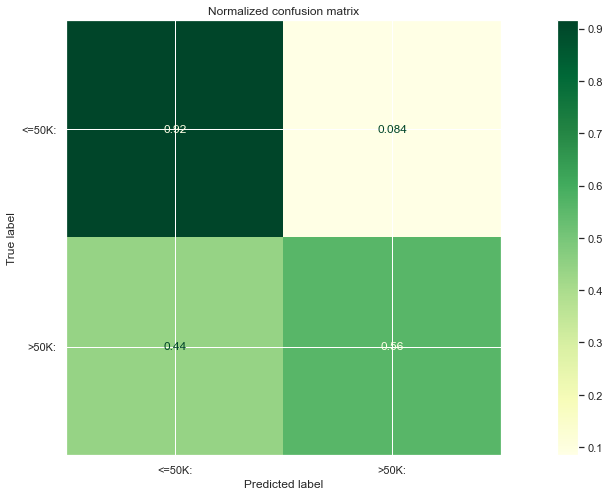

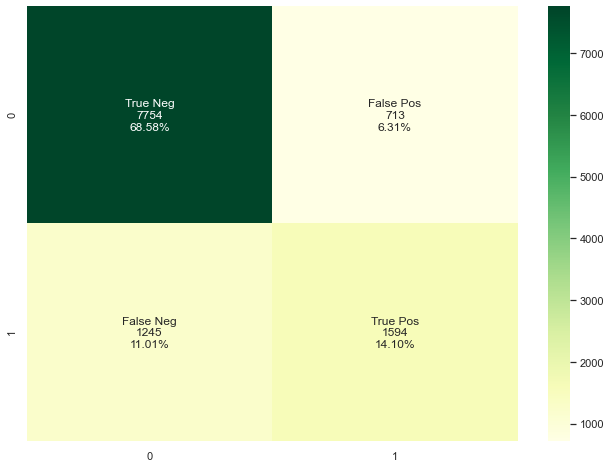

In [76]:
'''Parameters:
 1. True predicate (y_test in this case)'''
cfm = confusion_matrix(y_test, y_test_pred)

# Plot non-normalized confusion matrix
titles_options = [("Normalized confusion matrix", 'true')]
sns.set(rc={'figure.figsize':(20,8)}) # increase the size
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_MLP, X_test, y_test,
                                 display_labels=['<=50K:', '>50K:'],
                                 cmap=plt.cm.get_cmap('YlGn'),
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#Code below for confusion matrix was taken from: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(11,8)}) # increase the size
sns.heatmap(cfm, annot=labels, fmt='', cmap=plt.cm.get_cmap('YlGn'))

### Evaluation metrix

In [77]:
'''Printed dataframe will show information for value=1 which in this case is for ">50K"'''
'''Note-this is after applying NEW treshold value for Logistic Regression model'''
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score
pd.DataFrame(data=[[accuracy_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                   precision_score(y_test, y_test_pred),roc_auc_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)]],
            columns=["Accuracy","Recall","Precision","Roc auc score","F1 Score"],
            index=['Score'])

,Accuracy,Recall,Precision,Roc auc score,F1 Score
Score,0.826818,0.561465,0.690941,0.738628,0.61951


## Implementing RandomizedSearchCV for MLPClassifier together with MinMax scaler

In [78]:
'''Random Search is searching only for random subset of hyperparameters thus reduce computation time
For comparison Grid search performs exhaustive search'''

parameters_MLP = {
    'hidden_layer_sizes': [(55,55,55), (55,100,55), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [79]:
starttime = timeit.default_timer()

model_MLP = MLPClassifier(max_iter=650)

'''n_iter is a parameter which defines how many times 
we want to RandomSearchCV for. Random combination
random_state to repeat randomness state
return_train_score=False RSCV results won't include train scores
implementing parallel processing by changing deafult n_jobs = None to -1, which activate all available CPU cores
'''
rand_two = RandomizedSearchCV(model_MLP, parameters_MLP, cv=2, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=5, return_train_score=False)
#Fitting model with values scaled in MinMax scaler
rand_two.fit(X_MMs,y)
rand_two_time = timeit.default_timer() - starttime
print("The execution time for this part of code is {:.1f}".format(rand_two_time), "s")

The execution time for this part of code is 1327.9 s


In [80]:
pd.DataFrame(rand_two.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.817368,"{'solver': 'adam', 'learning_rate': 'constant'..."
1,0.802795,"{'solver': 'sgd', 'learning_rate': 'constant',..."
2,0.804277,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."
3,0.801911,"{'solver': 'adam', 'learning_rate': 'constant'..."
4,0.808611,"{'solver': 'adam', 'learning_rate': 'adaptive'..."
5,0.807925,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."
6,0.806510,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."
7,0.808766,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."
8,0.807395,"{'solver': 'adam', 'learning_rate': 'adaptive'..."
9,0.808898,"{'solver': 'adam', 'learning_rate': 'constant'..."


In [81]:
print(rand_two.best_params_) #dictionary with parameter for best score/optimal value
print(rand_two.best_estimator_) #actual parameters/estimators for the model/classifier that was used
print(rand_two.best_score_) #Will give the best score/don't need to look at the dataplot

{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (55, 100, 55), 'alpha': 0.0001, 'activation': 'relu'}
MLPClassifier(hidden_layer_sizes=(55, 100, 55), max_iter=650)
0.8173676529122993


## Implementing RandomizedSearchCV for RandomForestClassifier (with MinMax scaler)

In [82]:
starttime = timeit.default_timer()

#For MinMax scaler
X_train, X_test, y_train, y_test = train_test_split(X_MMs, y, test_size = 0.25, random_state = 0)

'''Random Hyperparameter Grid was taken from:
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74'''
# Number of trees in the model
trees_no = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split of the tree/node
features = ['auto', 'sqrt']
# Maximum level of the tree
depth_max = [int(x) for x in np.linspace(10, 110, num = 11)]
depth_max.append(None)
# Minimum number of samples required to split a node
samples_split_min = [2, 5, 10]
# Minimum number of samples required at each leaf node
samples_leaf_min = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

parameter_RFC = {'n_estimators': trees_no,
               'max_features': features,
               'max_depth': depth_max,
               'min_samples_split': samples_split_min,
               'min_samples_leaf': samples_leaf_min,
               'bootstrap': bootstrap}

starttime = timeit.default_timer()

model_RFC = RandomForestClassifier()

rand_three = RandomizedSearchCV(model_RFC, parameter_RFC, cv=3, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=5, return_train_score=False)
rand_three.fit(X_MMs,y)
time_rand_three = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.1f}".format(time_rand_three), "s")


The execution time for this part of code is 322.4 s


In [83]:
pd.DataFrame(rand_three.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.823095,"{'n_estimators': 1200, 'min_samples_split': 2,..."
1,0.833776,"{'n_estimators': 1000, 'min_samples_split': 2,..."
2,0.818783,"{'n_estimators': 2000, 'min_samples_split': 10..."
3,0.820110,"{'n_estimators': 1200, 'min_samples_split': 5,..."
4,0.831122,"{'n_estimators': 1400, 'min_samples_split': 5,..."
5,0.831011,"{'n_estimators': 400, 'min_samples_split': 10,..."
6,0.829375,"{'n_estimators': 600, 'min_samples_split': 5, ..."
7,0.826898,"{'n_estimators': 200, 'min_samples_split': 10,..."
8,0.811463,"{'n_estimators': 600, 'min_samples_split': 2, ..."
9,0.825240,"{'n_estimators': 2000, 'min_samples_split': 10..."


In [84]:
print(rand_three.best_params_) #dictionary with parameter for best score/optimal value
print(rand_three.best_estimator_) #actual parameters/estimators for the model/classifier that was used
print(rand_three.best_score_) #Will give the best score/don't need to look at the dataplot

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       n_estimators=1000)
0.8337755959488744


### Support Vector Classification with MinMax scaler

In [85]:
starttime = timeit.default_timer()

#For MinMax scaler
X_train, X_test, y_train, y_test = train_test_split(X_MMs, y, test_size = 0.25, random_state = 0)

model_SVM = SVC()
model_SVM.fit(X_train, y_train)
y_test_pred = model_SVM.predict(X_test)
accuracy_SVC = model_SVM.score(X_test, y_test)
print("The accuracy of the SVC model: {:.2f}".format(accuracy_SVC))
time_SVC = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.1f}".format(time_SVC), "s")

The accuracy of the SVC model: 0.80

The execution time for this part of code is 27.0 s


# Checking accuracy and performance for some additional models

### Linear Support Vector Classification model

In [86]:
starttime = timeit.default_timer()

#For MinMax scaler
X_train, X_test, y_train, y_test = train_test_split(X_MMs, y, test_size = 0.25, random_state = 0)

#For large datasets. It is used instead of SVC
model = LinearSVC()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
accuracy_LSVC = model.score(X_test, y_test)
print("The accuracy of the SVC model: {:.2f}".format(accuracy_LSVC))
time_LSVC = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_LSVC), "s")

The accuracy of the SVC model: 0.78

The execution time for this part of code is 0.62 s


### Stochastic Gradient Descent model

In [87]:
starttime = timeit.default_timer()

#For MinMax scaler
X_train, X_test, y_train, y_test = train_test_split(X_MMs, y, test_size = 0.25, random_state = 0)

#For large datasets. It is used instead of SVC
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
accuracy_SGD = model.score(X_test, y_test)
print("The accuracy of the SVC model: {:.2f}".format(accuracy_SGD))
time_SGD = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_SGD), "s")

The accuracy of the SVC model: 0.79

The execution time for this part of code is 0.20 s


### Gaussian Naive Bayes model

In [88]:
starttime = timeit.default_timer()

#For MinMax scaler
X_train, X_test, y_train, y_test = train_test_split(X_MMs, y, test_size = 0.25, random_state = 0)

model = GaussianNB()
model.fit(X_train, y_train)

accuracy_GNB = model.score(X_test, y_test)
print("The accuracy of the SVC model: {:.2f}".format(accuracy_GNB))
time_GNB = timeit.default_timer() - starttime
print("\nThe execution time for this part of code is {:.2f}".format(time_GNB), "s")

The accuracy of the SVC model: 0.74

The execution time for this part of code is 0.03 s


### Categorical Naive Bayes model

In [89]:
starttime = timeit.default_timer()
#For MinMax scaler
X_train, X_test, y_train, y_test = train_test_split(X_MMs, y, test_size = 0.25, random_state = 0)

'''The Categorical Naive Bayes classifier is better for classification with discrete features 
that are categorically distributed'''
model = CategoricalNB()
model.fit(X_train, y_train)

accuracy_CNB = model.score(X_test, y_test)
print("The accuracy of the SVC model: {:.2f}".format(accuracy_CNB))
time_CNB = round(timeit.default_timer() - starttime,2)
print("\nThe execution time for this part of code is {:.2f}".format(time_CNB), "s")
total_end_t = timeit.default_timer()
print("\nThe execution time for the entire project code is {:.1f}".format(total_end_t - total_start_t), "s")

The accuracy of the SVC model: 0.75

The execution time for this part of code is 0.05 s

The execution time for the entire project code is 3274.4 s


# SUMMARY 

In [90]:
summary_info= [["Logistic Regression",f'{accuracyLR1:.2%}',"None","Default model","Default", '{:.2f}'.format(time_LR1)],
["Logistic Regression",f'{accuracyLRNtresh:.2%}',"None","New treshold value:", '{:.2f}'.format(newT),'{:.2f}'.format(time_LRNtresh)],
["Support Vector Machines",f'{accuracySVM:.2%}',"None","Default model","Default", '{:.2f}'.format(time_SVM)],
["KNeighborsClassifier",f'{accuracyKNC1:.2%}',"None","Default model","Default", '{:.2f}'.format(time_KNC1)],
["KNeighborsClassifier",f'{grid_one.best_score_:.2%}',"None","GridSearchCV","cv=3, n_neighbors=16", '{:.2f}'.format(grid_one_time)],
["KNeighborsClassifier",f'{grid_two.best_score_:.2%}',"None","GridSearchCV with multiple hyperparameters","cv=3, n_neighbors=16, weights: uniform", '{:.2f}'.format(grid_two_time)],
["KNeighborsClassifier",f'{rand_one.best_score_:.2%}',"None","RandomizedSearchCV","random_state=5,n_neighbors=18, weights: uniform", '{:.2f}'.format(rand_one_time)],
["KNeighborsClassifier",f'{accuracyKNC_MM:.2%}',"MinMaxScaler","Default model","n_neighbors=16, weights='uniform'", '{:.2f}'.format(time_KNC_MM_time)],
["KNeighborsClassifier",f'{accuracyKNC_SS:.2%}',"StandardScaler","Default model","n_neighbors=16, weights='uniform'", '{:.2f}'.format(time_KNC_SS_time)],
["KNeighborsClassifier",f'{accuracyKNC_RScl:.2%}',"RobustScaler","Default model","n_neighbors=16, weights='uniform'", '{:.2f}'.format(time_KNC_RScl)],
["Multi-layer Perception Classifier",f'{accuracyMLP1:.2%}',"None","Default model","Default", '{:.2f}'.format(time_MLP1)],
["Multi-layer Perception Classifier",f'{accuracyMLP2:.2%}',"MinMaxScaler","Default model","Default", '{:.2f}'.format(time_MLP2)],
["Multi-layer Perception Classifier",f'{rand_two.best_score_:.2%}',"MinMaxScaler","RandomizedSearchCV","Check parameters_MLP", '{:.2f}'.format(rand_two_time)],
["Random Forest Classifier",f'{accuracyRFC1:.2%}',"None","Default model","Default", '{:.2f}'.format(time_RFC1)],
["Random Forest Classifier",f'{rand_three.best_score_:.2%}',"MinMaxScaler","RandomizedSearchCV","Check rand_three.best_params_/parameter_RFC", '{:.2f}'.format(time_rand_three)],
["Decision Tree Classifier",f'{accuracyDTC1:.2%}',"None","Default model","Default",'{:.2f}'.format(time_DTC1)],
["Support Vector Classification",f'{accuracy_SVC:.2%}',"MinMaxScaler","Default model","Default", '{:.2f}'.format(time_SVC)],
["Linear Support Vector Classification",f'{accuracy_LSVC:.2%}',"MinMaxScaler","Default model","Default", '{:.2f}'.format(time_LSVC)],
["Stochastic Gradient Descent",f'{accuracy_SGD:.2%}',"MinMaxScaler","Default model","loss=hinge, penalty=l2, max_iter=100", '{:.2f}'.format(time_SGD)],
["Gaussian Naive Bayes",f'{accuracy_GNB:.2%}',"MinMaxScaler","Default model","Default", '{:.2f}'.format(time_GNB)],
["Categorical Naive Bayes",f'{accuracy_CNB:.2%}',"MinMaxScaler","Default model","Default", '{:.2f}'.format(time_CNB)]]


frame=pd.DataFrame(summary_info,
            columns=["Model name","Testing accuracy","Used Scaler","Used library function","Parameters or best parameter info", "Execution time in sec"],
            index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
frame.style.set_table_styles([{'selector' : '', 
                            'props' : [('border', 
                                        '3px solid black')]}]) 

,Model name,Testing accuracy,Used Scaler,Used library function,Parameters or best parameter info,Execution time in sec
1,Logistic Regression,78.35%,None,Default model,Default,0.80
2,Logistic Regression,78.43%,None,New treshold value:,0.48,0.02
3,Support Vector Machines,78.77%,None,Default model,Default,27.48
4,KNeighborsClassifier,76.84%,None,Default model,Default,2.02
5,KNeighborsClassifier,81.19%,None,GridSearchCV,"cv=3, n_neighbors=16",58.32
6,KNeighborsClassifier,81.19%,None,GridSearchCV with multiple hyperparameters,"cv=3, n_neighbors=16, weights: uniform",75.19
7,KNeighborsClassifier,81.27%,None,RandomizedSearchCV,"random_state=5,n_neighbors=18, weights: uniform",30.82
8,KNeighborsClassifier,82.07%,MinMaxScaler,Default model,"n_neighbors=16, weights='uniform'",2.67
9,KNeighborsClassifier,81.73%,StandardScaler,Default model,"n_neighbors=16, weights='uniform'",3.92
10,KNeighborsClassifier,81.65%,RobustScaler,Default model,"n_neighbors=16, weights='uniform'",3.30
